<a href="https://colab.research.google.com/github/InMyDream21/Deep-Learning/blob/main/Tensorflow/zerotomastery/natural_language/Introduction_to_NLP_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in Tensorflow

NLP has the goal of deriving information out of natural language (could be sequences of text or speech)

Another common therm for NLP problems is sequence to sequence problems (seq2seq).

## Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-060db417-6457-26bc-cd2f-c6f088857ff5)


## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook 
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-02-02 02:06:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-02 02:06:01 (103 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP Dataset (text samples of Tweets labelled as disaster or not disaster).

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-02-02 02:06:03--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-02-02 02:06:03 (111 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class are there?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # Create random indexes
for row in train_df_shuffled[["text", "target"]][random_index : random_index + 5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(Real disaster)" if target > 0 else "(Not real disaster)")
  print(f"Text:\n{text}")
  print(f"---\n")

Target: 1 (Real disaster)
Text:
The Adventures of Mineness #9   The Famine Is Over http://t.co/spYmIQNeCj
---

Target: 0 (Not real disaster)
Text:
Never fear quarrels but seek hazardous adventures. https://t.co/dlvZaay7qr
---

Target: 0 (Not real disaster)
Text:
#LOL Plymouth (Û÷LetÛªs Obliterate LitterÛª) http://t.co/GDrssjbH8q
---

Target: 0 (Not real disaster)
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY
---

Target: 0 (Not real disaster)
Text:
Nike Golf Storm Fit Golf Jacket Black Medium http://t.co/jvAI5Vkmsy: #SportingGoods http://t.co/Nr8JjmpmoS
---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

In [ ]:
# Check the len
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
 #Check the first 10 example
 train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with text problem, one of the first things youll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token ( a token could be a word or a character) to a number
* Embedding - Create a matrix of feature vector for each token (the size of feature can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVEctorization parameters
text_vectorizer = TextVectorization(max_tokens = None, # How many word in the vocabulary (automatically add <OOV>)
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None, # Creates group of n-words?
                                    output_mode = "int", # How to map tokens to number
                                    output_sequence_length = None) # How long do you want your sequences to be

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # Max number of word to have in our vocab
max_length = 15 # max length our sequences will be (e.g. how many word from a tweet does a model sees)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length,
                                    pad_to_max_tokens = True)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence fro mthe training dataset and toknize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\n Vectorized version:")
text_vectorizer([random_sentence])

Original text:
 I'm in utter shock and devastation you don't go to work to be left feeling how I do now. Life really is too short ??      

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  32,    4, 2625, 3422,    7,  515,   12,   63,  112,    5,  166,
           5,   21,  601,  707]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # Get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # Get the most common words
bottom_5_words = words_in_vocab[-5:] # Get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

To make our embedding we're going to use TensorFlow's embedding layer

The parameters we care most about for our embedding layer:
* `input_dim` = The size of our vocabulary
* `output_dim` = The size of the output embedding vector, for example, a value of 100 wouyld mean each token gets represented by a vector of 100 long
* `input_length` = The length of sequences being passes to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length # How longis each input
                             )

embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\n Embedded version:")

# Embed the random sentence (turn into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 THE GIRLS NEXT TO ME SCREAMED WHAT THE FUCK IS A CHONCE I'm CRYIBG        

 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01745827, -0.04027807, -0.04154819, ...,  0.0076321 ,
         -0.01042143, -0.02712539],
        [ 0.03284119,  0.02250583, -0.01361126, ..., -0.00728483,
         -0.0242401 ,  0.01535085],
        [ 0.01453437, -0.04236933, -0.0405447 , ...,  0.00288254,
          0.03992338, -0.02221133],
        ...,
        [ 0.04060309,  0.00234481,  0.01872778, ..., -0.00943976,
         -0.00573342,  0.00364376],
        [ 0.04863944, -0.02279031, -0.01557392, ..., -0.04514768,
         -0.00119035,  0.04901293],
        [ 0.02137741, -0.03785545, -0.00385774, ..., -0.03924265,
         -0.00552647,  0.00745184]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.01745827, -0.04027807, -0.04154819,  0.03591851,  0.00524112,
        -0.01939048,  0.00870043,  0.02234879, -0.03942894,  0.01349089,
        -0.01607639, -0.02083162,  0.00023823,  0.01934958, -0.01588495,
        -0.0450791 ,  0.04536561,  0.0412023 ,  0.04186929, -0.03000013,
        -0.04679251, -0.02223293,  0.02639133, -0.01413177,  0.03869077,
        -0.04408354, -0.03289818, -0.03273405, -0.03774843,  0.01691002,
        -0.01502913, -0.04394646,  0.00398833, -0.02866571,  0.00767434,
         0.01881862, -0.03689445, -0.04750597,  0.00461369, -0.0054936 ,
        -0.00367482, -0.01556188,  0.04173464,  0.0205492 , -0.03353045,
        -0.02333599, -0.01294798, -0.02291793, -0.04233749, -0.04305202,
        -0.04666926, -0.00136646, -0.0026235 , -0.01498747, -0.03737762,
        -0.0426734 , -0.03699416, -0.04903443,  0.03363403, -0.00955904,
         0.02583761, -0.04357188,  0.0025653 ,  0.04881399,  0.02303072,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline) (from SKLearn ML map)
* Model 1: Feed-forward Neural network (dense model)
* Model 2: LSTM Model (RNN)
* Model 3: GRU Model (RNN)
* Model 4: Bidirectional-LSTM Model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of the data

How are we going to approach all of these?

Use the standard steps in modelling with tensorflow:

* Create a model
* Build a model
* Fit a model
* Evaluate a model

### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll use sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our word to number

> **Note:** Its commong to use non-DL algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # Convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # Model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics everytime, however, this will eb cumbersome and could easily be fixed with a function

Lets create one to compare our model's predictions with the truth labels using the following metrics
* Accuracy
* Precision
* Recal
* F1-Score

In [ ]:
# FUnction to evaluate: Accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1-score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall, and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")
  model_results = {"accuracy" : model_accuracy,
                   "precision" : model_precision,
                   "recall" : model_recall,
                   "f1" : model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1: A simple dense model

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
save_dir = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string) # Inputs are 1-dimensional strings
x = text_vectorizer(inputs) # Turn the inpur text into numbers
x = embedding(x) # Create an embedding of the numberize input
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x) # Create the output layer, want binary outputs so use sigmoid activations function
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = save_dir,
                                                                       experiment_name = "model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220202-020609
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.6116 - accuracy: 0.6935 - val_loss: 0.5345 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4420 - accuracy: 0.8177 - val_loss: 0.4690 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3473 - accuracy: 0.8609 - val_loss: 0.4606 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2854 - accuracy: 0.8895 - val_loss: 0.4609 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2399 - accuracy: 0.9107 - val_loss: 0.4761 - val_accuracy: 0.7861


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.7861


[0.476059228181839, 0.7860892415046692]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'f1': 0.7837076401553273,
 'precision': 0.7892068285860523,
 'recall': 0.7860892388451444}

In [ ]:
# Looks like our baseline is outperforming our first deep learning model
import numpy as np 
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualize learned embedding

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary 
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for ~5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

Now we've got the embedding matrix our model has learned to represent our tokens, lets see how we can visualize it.

To do so, TensorFlow has a handy tool called projector..

In [ ]:
# # Create embedding files
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words_in_vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_weights[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [ ]:
# # Download files from colab to upload to projector
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

## Recurrent Neural Networks (RNNs)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

### Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [ ]:
# Create an LSTM Model
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences = True)(x) # When youre stacking RNNs cells together, you need to set return_sequences = True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

In [ ]:
# Get a summary 
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220202-020623
Epoch 1/5
215/215 [==============================] - 10s 15ms/step - loss: 0.2247 - accuracy: 0.9156 - val_loss: 0.5579 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1565 - accuracy: 0.9416 - val_loss: 0.5727 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1272 - accuracy: 0.9518 - val_loss: 0.7180 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1040 - accuracy: 0.9581 - val_loss: 0.9355 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0839 - accuracy: 0.9667 - val_loss: 0.9680 - val_accuracy: 0.7756


In [ ]:
# Make predictions with LSTM Model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.7770648e-03],
       [6.7351896e-01],
       [9.9962926e-01],
       [4.3113131e-02],
       [2.5969892e-04],
       [9.9852496e-01],
       [8.0030954e-01],
       [9.9979550e-01],
       [9.9964142e-01],
       [4.3915266e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_2 results
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.55905511811024,
 'f1': 0.7736182129212565,
 'precision': 0.7772070861555818,
 'recall': 0.7755905511811023}

### Model 3: GRU  

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.GRU(64, return_sequences = True)(x) # If you want to stack recurrent layer on top of each other, you need return_sequences = True
# x = layers.LSTM(64, return_sequences = True)(x)
# x = layers.GRU(64)(x)
# x = layers.Dense(64, activation = "relu")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [ ]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# COmpile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220202-020648
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.1550 - accuracy: 0.9423 - val_loss: 0.8029 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0839 - accuracy: 0.9688 - val_loss: 0.8491 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0698 - accuracy: 0.9737 - val_loss: 0.9517 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0724 - accuracy: 0.9704 - val_loss: 0.9672 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0527 - accuracy: 0.9765 - val_loss: 1.0700 - val_accuracy: 0.7717


In [ ]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[8.2195271e-04],
       [9.1328961e-01],
       [9.9973172e-01],
       [1.1024324e-01],
       [1.3395170e-04],
       [9.9923599e-01],
       [7.2672695e-01],
       [9.9989963e-01],
       [9.9987340e-01],
       [7.9835314e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_3 results
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 77.16535433070865,
 'f1': 0.7697096359746837,
 'precision': 0.773049502603257,
 'recall': 0.7716535433070866}

### Model 4: Bidirectional RNN

Normal RNNs go from left to right (just like you'd read an English sentences) however, a bidirectional RNN goes from right to left as well as left to right.

In [ ]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_bidirectional")

In [ ]:
# Get a summary 
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                      "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220202-020657
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.1052 - accuracy: 0.9705 - val_loss: 0.9197 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0525 - accuracy: 0.9766 - val_loss: 1.2201 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0446 - accuracy: 0.9787 - val_loss: 1.3103 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0427 - accuracy: 0.9793 - val_loss: 1.5589 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0416 - accuracy: 0.9799 - val_loss: 1.4228 - val_accuracy: 0.7703


In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[9.2086360e-02],
       [6.0389709e-01],
       [9.9997211e-01],
       [3.1900924e-01],
       [2.2481185e-05],
       [9.9984133e-01],
       [8.7346065e-01],
       [9.9999213e-01],
       [9.9998450e-01],
       [9.9902284e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 77.03412073490814,
 'f1': 0.7695203715374298,
 'precision': 0.7701208199177533,
 'recall': 0.7703412073490814}

## Convolutional Neural Networks for Text (and other types of sequences)

We've used CNNs for images, but images are typically 2D (height x width).. However our text data is 1D.

Previously we've used Conv2d but now we're using Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text):

``` 
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs
```

### Model 5: Conv1D

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # Turn target sequence into emebdding
conv_1d = layers.Conv1D(filters = 32,
                        kernel_size = 5,
                        activation = "relu",
                        padding = "valid")
conv_1d_output = conv_1d(embedding_test) # Pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # Get the most important feature

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# Create 1d convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  activation = "relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name = "model_5_Conv1D")

# Compile 
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Get a summary of out Conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220202-020716
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1236 - accuracy: 0.9628 - val_loss: 0.8985 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0734 - accuracy: 0.9723 - val_loss: 1.0579 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0613 - accuracy: 0.9775 - val_loss: 1.1521 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0530 - accuracy: 0.9796 - val_loss: 1.2191 - val_accuracy: 0.7467
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0514 - accuracy: 0.9778 - val_loss: 1.2030 - val_accuracy: 0.7546


In [ ]:
# make osme predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[3.1565440e-01],
       [8.8413262e-01],
       [9.9998450e-01],
       [9.2529118e-02],
       [2.3167873e-07],
       [9.9891877e-01],
       [9.9334222e-01],
       [9.9999785e-01],
       [9.9999952e-01],
       [9.2153847e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5_preds)
model_5_results

{'accuracy': 75.45931758530183,
 'f1': 0.7539896621078285,
 'precision': 0.7541438883776402,
 'recall': 0.7545931758530183}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we've build a few of our own models, lets try and use transfer learning for NLP, specifically using tensorflow hub's universal sentence encoder

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call the universal sentence encoder on a sentence it turns it into numbers"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
# Create a keras layer using the uSE pretrained layer from tensorflow hub
from tensorflow.keras import layers
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE")

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation = "relu"),
  layers.Dense(1, activation = "sigmoid", name = "output_layer")
], name = "model_6_use")

# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_6.summary()

Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                      "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20220202-023239
Epoch 1/5
215/215 [==============================] - 4s 13ms/step - loss: 0.5023 - accuracy: 0.7812 - val_loss: 0.4483 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 2s 12ms/step - loss: 0.4145 - accuracy: 0.8167 - val_loss: 0.4411 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.4001 - accuracy: 0.8238 - val_loss: 0.4312 - val_accuracy: 0.8189
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3914 - accuracy: 0.8262 - val_loss: 0.4271 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3848 - accuracy: 0.8320 - val_loss: 0.4267 - val_accuracy: 0.8136


In [ ]:
# Make predictions with USE tf hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.19171517],
       [0.77980834],
       [0.98947436],
       [0.20109439],
       [0.7339748 ],
       [0.78697515],
       [0.985631  ],
       [0.9806574 ],
       [0.9494847 ],
       [0.07653016]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'f1': 0.8123558654721007,
 'precision': 0.8152128321955759,
 'recall': 0.8136482939632546}

## Model 7: TF Hub pretrained USE but with 10% of the training data

Transfer learning really helps when you dont have a large dataset.

To see how our model performs on a smaller fataset, let's replicate `model_6` except we'll train it on 10% of the data.

In [ ]:
## Note: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% data)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SETS

# Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac = 0.1, random_state = 42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

> **Note:** Be *very* careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 10% of data) trust your gut and go back through to find where the error may lie.

In [ ]:
#  Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [ ]:
# Check the number of each label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same as a previous model youve created you can use the `tf.keras.models.clone_model()` methods.

In [ ]:
# Lets build a model same as model 6
# model_7 = tf.keras.models.clone_model(model_6)
model_7 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation = "relu"),
  layers.Dense(1, activation = "sigmoid", name = "output_layer")
], name = "model_7_use")

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Get a summary
model_7.summary()

Model: "model_7_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       "model_7_USE_correct_split")])

Saving TensorBoard log files to: model_logs/model_7_USE_correct_split/20220202-031006
Epoch 1/5
22/22 [==============================] - 2s 39ms/step - loss: 0.6663 - accuracy: 0.6774 - val_loss: 0.6443 - val_accuracy: 0.7218
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5901 - accuracy: 0.8131 - val_loss: 0.5859 - val_accuracy: 0.7664
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5158 - accuracy: 0.8219 - val_loss: 0.5357 - val_accuracy: 0.7612
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4569 - accuracy: 0.8219 - val_loss: 0.5067 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4170 - accuracy: 0.8394 - val_loss: 0.4941 - val_accuracy: 0.7769


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.18960972],
       [0.58389944],
       [0.9097137 ],
       [0.34407297],
       [0.5152516 ],
       [0.70101345],
       [0.87062126],
       [0.7623902 ],
       [0.8450002 ],
       [0.13534632]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 77.69028871391076,
 'f1': 0.7752416323647977,
 'precision': 0.7779652793701148,
 'recall': 0.7769028871391076}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "LSTM": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_USE_encoder": model_6_results,
                                  "tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.608924,0.789207,0.786089,0.783708
LSTM,77.559055,0.777207,0.775591,0.773618
gru,77.165354,0.773050,0.771654,0.769710
bidirectional,77.034121,0.770121,0.770341,0.769520
conv1d,75.459318,0.754144,0.754593,0.753990
tf_hub_USE_encoder,81.364829,0.815213,0.813648,0.812356
tf_hub_use_encoder_10_percent,77.690289,0.777965,0.776903,0.775242


In [ ]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
# all_model_results

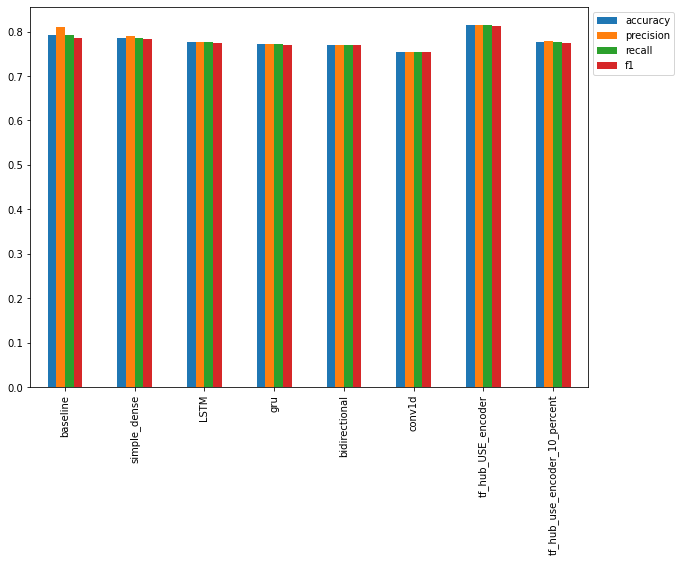

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind = "bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

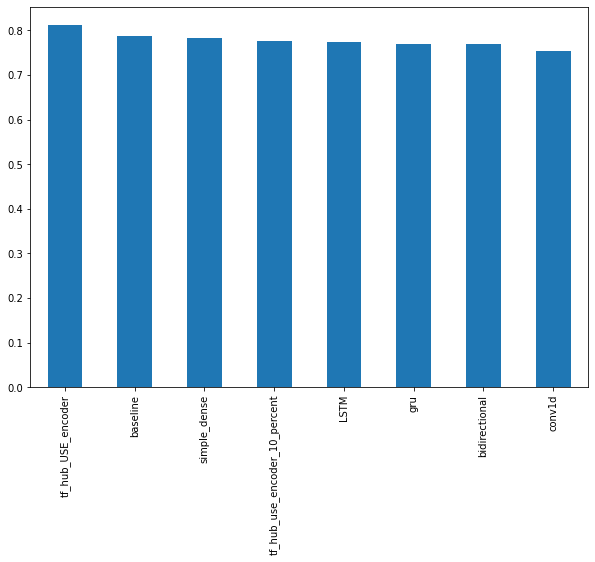

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending = False)["f1"].plot(kind = "bar", figsize = (10, 7));

## Uploading our model training logs to TensorBoard.dev

In [ ]:
# View TensorBoard logs of transfer learning modelling experiments (plus all of our other model)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Experiments ZTM TF Course" \
  --description "Comparing multiple different types of model architectures on the Kaggle Tweets text classification dataset" \
  --one_shot # EXit the uploader once uploading is finished

The experiments are visable on TensorBoard.dev:  https://tensorboard.dev/experiment/Ea54dlkyQuGpBli2X2kwqw/

In [ ]:
# See the previous TensorBoard dev experiments you've run
!tensorboard dev list

https://tensorboard.dev/experiment/Ea54dlkyQuGpBli2X2kwqw/
	Name                 NLP Modelling Experiments ZTM TF Course
	Description          Comparing multiple different types of model architectures on the Kaggle Tweets text classification dataset
	Id                   Ea54dlkyQuGpBli2X2kwqw
	Created              2022-02-02 03:38:05 (4 minutes ago)
	Updated              2022-02-02 03:38:14 (4 minutes ago)
	Runs                 18
	Tags                 5
	Scalars              270
	Tensor bytes         0
	Binary object bytes  4729198
https://tensorboard.dev/experiment/t7z4z7GtQvS6QK5izeUjeg/
	Name                 EfficientNetB0 Feature Extraction vs Fine-tuning all dataset
	Description          Milestone project 1 on Food101 Dataset with EfficientNetB0 architecture feature extraction and fine-tuning
	Id                   t7z4z7GtQvS6QK5izeUjeg
	Created              2022-01-22 08:58:00
	Updated              2022-01-22 08:58:05
	Runs                 6
	Tags                 5
	Scalars    

In [ ]:
# If you need to delete an experiment from tensorboard you can run the following
# !tensorboard dev delete --experiment_id the id

## Saving and loading a trained model

There are 2 main formats to save a model to in TensorFlow:
1. The HDF5 format
2. The `SavedModel` format (this is the default when using TensorFlow)

In [ ]:
# Save TF Hub sentence encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom Hub Layer (required HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects = {"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 17ms/step - loss: 0.4267 - accuracy: 0.8136


[0.4267328977584839, 0.8136482834815979]

Now lets save to the `SavedModel` format...

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [ ]:
# Load in a model from the SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4267 - accuracy: 0.8136


[0.4267328977584839, 0.8136482834815979]

## Find the most wrong examples

* If our best model still isnt perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those with prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predict a prediction probability of 0.99 (really close to 1) and vice versa.

In [ ]:
# Download a pretrained model from google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-02-02 04:00:10--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   130MB/s    in 9.7s    

2022-02-02 04:00:20 (94.2 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.

In [ ]:
# Import previously trained model from GOogle Storage
model_6_pretrained = tf.keras.models.load_model("/content/08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # These should be in labels format

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create a DataFrame with validation sentences and best performign model predictions 
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_probs": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_probs", ascending = False)
most_wrong[:10]

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


Lets remind ourselves of the target labels..
* `0` = not disaster
* `1` = disaster

In [ ]:
# Check the false negatives (model predicted 0 when should've predicted 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.055075809359550476
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460336431860924
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0

## Making predictions on the test dataset

In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

Pred: 1, Prob: 0.6176865100860596
Text:
An Appeal By Cardinal Charles Bo SDB ( CNUA) Dear Brothers and Sisters The  recent cyclone and the massive... http://t.co/bLgH5bTV8T

-----

Pred: 1, Prob: 0.5019571781158447
Text:
The sinkhole that ate Brooklyn http://t.co/28r2IgxmIE

-----

Pred: 0, Prob: 0.426398903131485
Text:
.@ArneJungjohann #Energiewende is directly responsible for the collapse in energy value. http://t.co/NxvjPj610W

-----

Pred: 0, Prob: 0.3830578923225403
Text:
It was finally demolished in the spring of 2013 and the property has sat vacant since. The justÛ_: saddlebrooke... http://t.co/MDKV7c3el4

-----

Pred: 0, Prob: 0.4574725329875946
Text:
Apple's momentum 'meltdown' bites investors - http://t.co/hsECqcdc7P #Apple #Stocks #Crash #TimCook #Investment

-----

Pred: 1, Prob: 0.9665987491607666
Text:
Heat wave adding to the misery of internally-displaced Gazans http://t.co/jW3hN9ewFT via @PressTV http://t.co/NYWrkRQ7Kn

-----

Pred: 0, Prob: 0.2148812860250473
Text:
@V

## The speed/score tradeoff

In [ ]:
# Lets make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # Get start time
  model.predict(samples) # Make predictions
  end_time = time.perf_counter() # Get finish time
  total_time = end_time - start_time # Calculate how long predictions took to make
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time , model_6_time_per_pred = pred_timer(model_6_pretrained,
                                                             val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.44083911500092654, 0.0005785290223109272)

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0,
                                                              val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.06330041000001074, 8.307140419948916e-05)

In [ ]:
# Get results for pretrained GS Model
model_6_pretrained_results = calculate_results(val_labels,
                                               model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'f1': 0.8148082644367335,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651}

Text(0, 0.5, 'F1-Score')

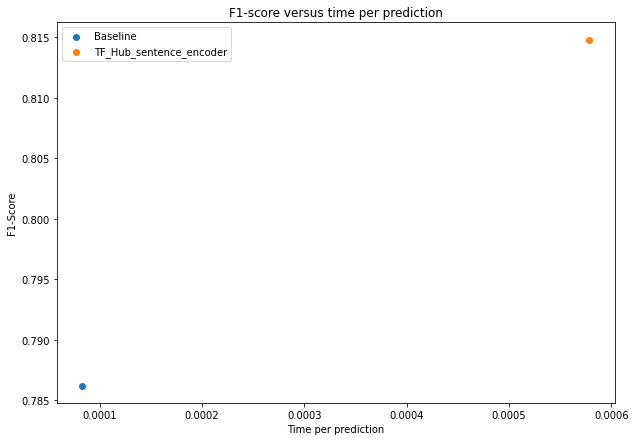

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label = "Baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label = "TF_Hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score")